In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests as re
from tqdm import tqdm
import time

import nba_api
from nba_api.live.nba.endpoints import scoreboard
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players

from mar_designs import tidy_axes

In [3]:
facecolor = "#F7F5F2"
figsize=(11,6)

In [4]:
# Today's Score Board
games = scoreboard.ScoreBoard()

# json
games.get_json()

# dictionary
gameDict = games.get_dict()

In [5]:
listOfCurrentGames = gameDict["scoreboard"]["games"] # this is a list of dictionaries. each dictionary represents a different game for a given day.

In [6]:
# Nikola Jokić
career = playercareerstats.PlayerCareerStats(player_id='203999') 


# dictionary
jk = career.get_data_frames()[0]
jk.to_csv("../data/jk_stats.csv")

In [7]:
# Get all players
all_players = players.get_players()

# Find Russell Westbrook
westbrook = [player for player in all_players if player['full_name'] == "Russell Westbrook"]

# Display his ID
print(westbrook)


[{'id': 201566, 'full_name': 'Russell Westbrook', 'first_name': 'Russell', 'last_name': 'Westbrook', 'is_active': True}]


In [8]:
career = playercareerstats.PlayerCareerStats(player_id="201566")
wb = career.get_data_frames()[0]
wb.tail()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
14,201566,2022-23,00,1610612747,LAL,34.0,52,3,1491.0,304,...,0.655,59,262,321,391,53,23,184,121,827
15,201566,2022-23,00,1610612746,LAC,34.0,21,21,635.0,128,...,0.658,30,72,102,160,23,10,71,41,332
16,201566,2022-23,00,0,TOT,34.0,73,24,2126.0,432,...,0.656,89,334,423,551,76,33,255,162,1159
17,201566,2023-24,00,1610612746,LAC,35.0,68,11,1529.0,301,...,0.688,93,250,343,306,74,23,144,121,754
18,201566,2024-25,00,1610612743,DEN,36.0,48,27,1328.0,235,...,0.641,66,179,245,307,72,24,146,121,623


In [9]:
# Fix the TOT in TEAM_ABBREVIATION to LAC
wb.loc[16, "TEAM_ABBREVIATION"] = "LAC"
wb.tail()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
14,201566,2022-23,00,1610612747,LAL,34.0,52,3,1491.0,304,...,0.655,59,262,321,391,53,23,184,121,827
15,201566,2022-23,00,1610612746,LAC,34.0,21,21,635.0,128,...,0.658,30,72,102,160,23,10,71,41,332
16,201566,2022-23,00,0,LAC,34.0,73,24,2126.0,432,...,0.656,89,334,423,551,76,33,255,162,1159
17,201566,2023-24,00,1610612746,LAC,35.0,68,11,1529.0,301,...,0.688,93,250,343,306,74,23,144,121,754
18,201566,2024-25,00,1610612743,DEN,36.0,48,27,1328.0,235,...,0.641,66,179,245,307,72,24,146,121,623


In [10]:
wb.to_csv("../data/wb_stats.csv")

## Triple double defined as 10 or more in each of these categories: PTS, REB, AST

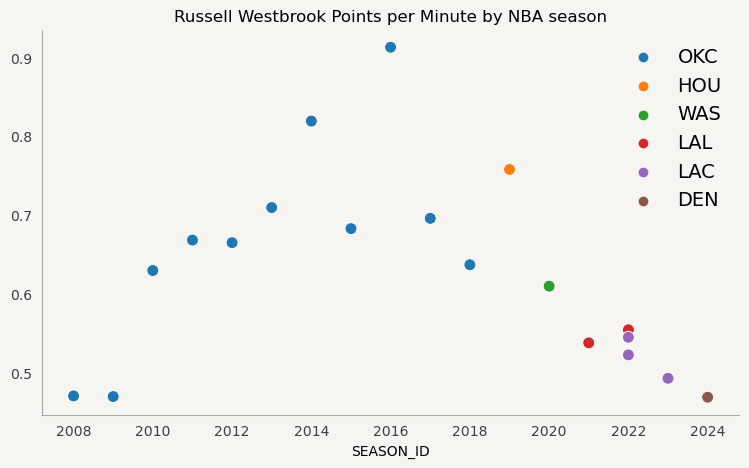

In [13]:
fig, ax = plt.subplots(figsize=figsize)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
years = wb["SEASON_ID"].apply(lambda year: int(year[0:4]))

pointsPerMinute = wb["PTS"]/wb["MIN"]

sns.scatterplot(x=years, y=pointsPerMinute, hue=wb["TEAM_ABBREVIATION"], s=74)
tidy_axes(ax)
ax.set_title("Russell Westbrook Points per Minute by NBA season")

plt.savefig("../images/wb_points_per_minute.png")
plt.show()

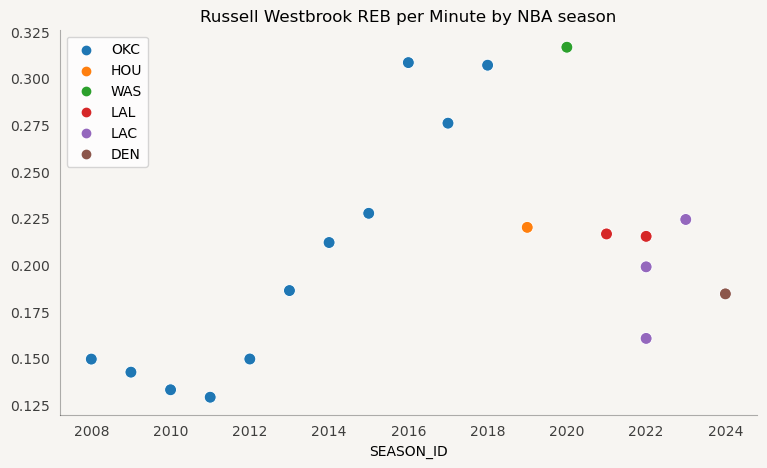

In [17]:
fig, ax = plt.subplots(figsize=figsize)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
years = wb["SEASON_ID"].apply(lambda year: int(year[0:4]))

reboundsPerMinute = wb["REB"]/wb["MIN"]

sns.scatterplot(x=years, y=reboundsPerMinute, hue=wb["TEAM_ABBREVIATION"], s=74)
tidy_axes(ax)
ax.set_title("Russell Westbrook REB per Minute by NBA season")

plt.savefig("../images/wb_reb_per_minute.png")
plt.legend(loc=2)
plt.show()

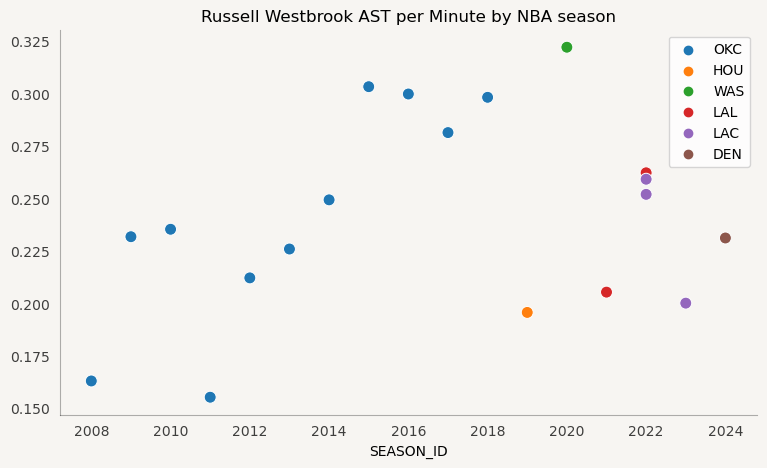

In [18]:
fig, ax = plt.subplots(figsize=figsize)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
years = wb["SEASON_ID"].apply(lambda year: int(year[0:4]))

assistsPerMinute = wb["AST"]/wb["MIN"]

sns.scatterplot(x=years, y=assistsPerMinute, hue=wb["TEAM_ABBREVIATION"], s=74)
tidy_axes(ax)
ax.set_title("Russell Westbrook AST per Minute by NBA season")

plt.savefig("../images/wb_ast_per_minute.png")
plt.legend(loc="best")
plt.show()

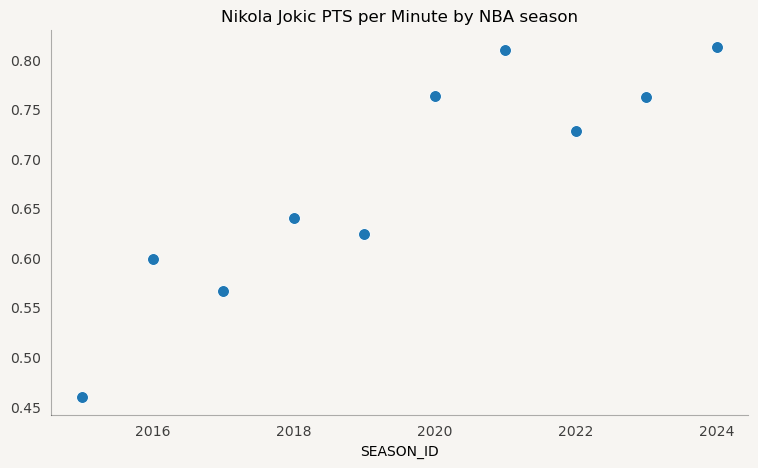

In [19]:
fig, ax = plt.subplots(figsize=figsize)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
years = jk["SEASON_ID"].apply(lambda year: int(year[0:4]))

ptsPerMinute = jk["PTS"]/jk["MIN"]

sns.scatterplot(x=years, y=ptsPerMinute, s=74)
tidy_axes(ax)
ax.set_title("Nikola Jokic PTS per Minute by NBA season")

plt.savefig("../images/jk_pts_per_minute.png")
plt.show()

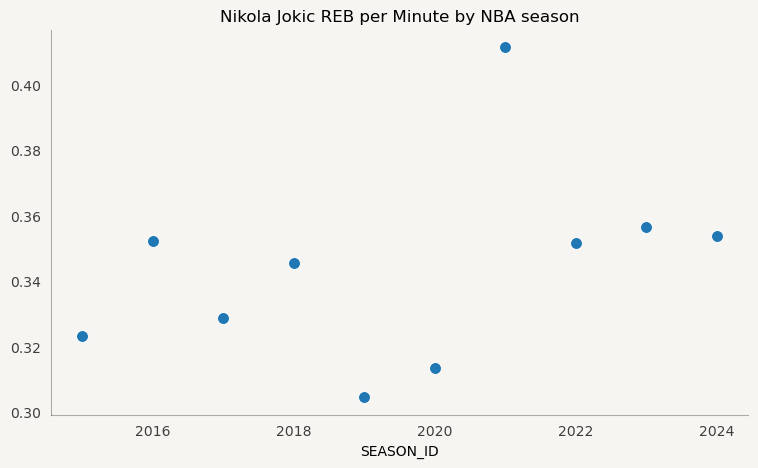

In [20]:
fig, ax = plt.subplots(figsize=figsize)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
years = jk["SEASON_ID"].apply(lambda year: int(year[0:4]))

rebPerMinute = jk["REB"]/jk["MIN"]

sns.scatterplot(x=years, y=rebPerMinute, s=74)
tidy_axes(ax)
ax.set_title("Nikola Jokic REB per Minute by NBA season")

plt.savefig("../images/jk_reb_per_minute.png")
plt.show()

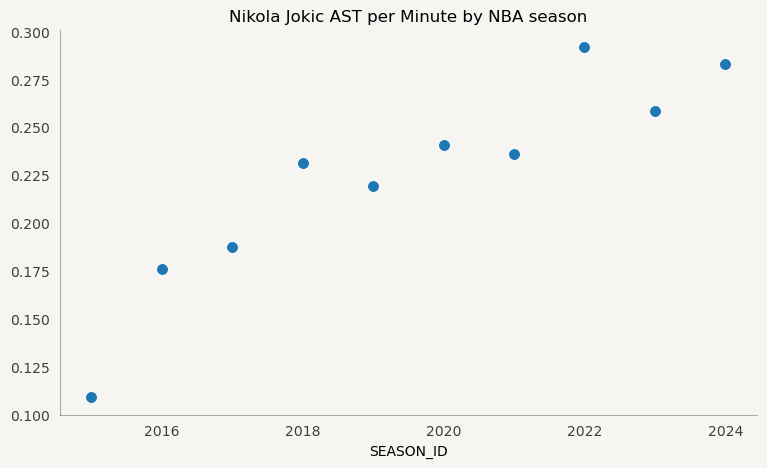

In [21]:
fig, ax = plt.subplots(figsize=figsize)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
years = jk["SEASON_ID"].apply(lambda year: int(year[0:4]))

astPerMinute = jk["AST"]/jk["MIN"]

sns.scatterplot(x=years, y=astPerMinute, s=74)
tidy_axes(ax)
ax.set_title("Nikola Jokic AST per Minute by NBA season")

plt.savefig("../images/jk_ast_per_minute.png")
plt.show()

### Now look at news API

In [116]:
# Get my API key --- get your own plz!
with open("../../key_for_newsAPI.txt") as f:
    key = f.readlines()[0].strip()

In [117]:
endpoint = "https://newsapi.org/v2/everything"
query = "Russell Westbrook"
language = "en"

url = f"{endpoint}/?q={query}&language={language}&apiKey={key}"
wbNews = re.get(url)
wbNews

<Response [200]>

In [118]:
# Look at possible keys on articles
wbNews.json()["articles"][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [119]:
grandList = []
for article in wbNews.json()["articles"]:
    grandList.append([article["source"], article["title"], article["description"], article["publishedAt"]])

df = pd.DataFrame(grandList, columns=["Source", "Title", "Description", "Published At"])
df.to_csv("WestbrookNews.csv")
df.head()

,Source,Title,Description,Published At
0,"{'id': 'espn', 'name': 'ESPN'}",Nuggets snap skid but see Westbrook exit early,Nuggets guard Russell Westbrook left Friday ni...,2025-02-01T04:21:47Z
1,"{'id': 'espn', 'name': 'ESPN'}","Jokic, Russ make NBA history with triple-doubles",Denver's Nikola Jokic and Russell Westbrook ma...,2025-01-11T06:13:31Z
2,"{'id': 'bleacher-report', 'name': 'Bleacher Re...",The 5 Most Overrated Trade Targets Ahead of 20...,The 2024-25 campaign could provide us with one...,2025-01-11T12:00:00Z
3,"{'id': None, 'name': 'BBC News'}",Young's buzzer-beater seals win for Atlanta Hawks,Trae Young scores a dramatic buzzer-beater to ...,2025-01-08T07:55:17Z
4,"{'id': 'bleacher-report', 'name': 'Bleacher Re...","Broncos' 2025 Free Agents, Targets and Draft N...","From a big-picture perspective, the Denver Bro...",2025-01-12T21:07:31Z


In [120]:
# Will need to get more data and filter for LA years
df.info()
df.to_csv("../data/wb_news.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source        100 non-null    object
 1   Title         100 non-null    object
 2   Description   100 non-null    object
 3   Published At  100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


## GO back to basketball stats -- checkout LeBron

In [121]:
# Get all players
all_players = players.get_players()

# Find Russell Westbrook
james = [player for player in all_players if player['full_name'] == "LeBron James"]

# Display his ID
print(james)

[{'id': 2544, 'full_name': 'LeBron James', 'first_name': 'LeBron', 'last_name': 'James', 'is_active': True}]


In [23]:
totalPointsPerYearsInLeague = []
totalAssistsPerYearsInLeague = []
totalReboundsPerYearsInLeague = []
all_IDs = {d["id"]:d["full_name"] for d in all_players if d["is_active"] == True}

for player_ID in tqdm(all_IDs.keys()):
    career = playercareerstats.PlayerCareerStats(player_id=player_ID)
    careerDF = career.get_data_frames()[0]
    
    totalPoints = careerDF["PTS"].sum()
    totalAssists = careerDF["AST"].sum()
    totalRebounds = careerDF["REB"].sum()
    
    totalYears = len(careerDF["SEASON_ID"].unique())
    
    if totalYears>0:
        totalPointsPerYearsInLeague.append(totalPoints/totalYears)
        totalAssistsPerYearsInLeague.append(totalAssists/totalYears)
        totalReboundsPerYearsInLeague.append(totalRebounds/totalYears)
        
    time.sleep(1)


100%|██████████| 544/544 [12:05<00:00,  1.33s/it]


In [125]:
wbRatio = wb["PTS"].sum()/len(wb["SEASON_ID"].unique())
ykRatio = jk["PTS"].sum()/len(jk["SEASON_ID"].unique())

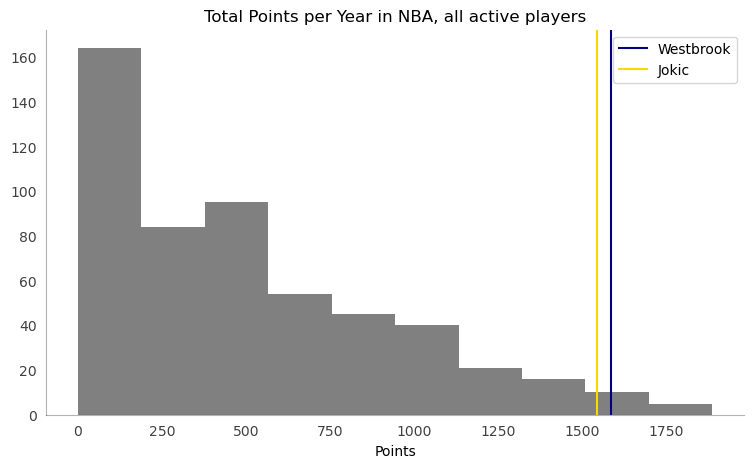

In [134]:
fig, ax = plt.subplots(figsize=(9,5))
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
ax.hist(totalPointsPerYearsInLeague, color="grey")
tidy_axes(ax)
ax.set_title("Total Points per Year in NBA, all active players")
ax.axvline([wbRatio], label="Westbrook", c="navy")
ax.axvline([ykRatio], label="Jokic", c="gold")
ax.set_xlabel("Points")
ax.legend()

plt.savefig("../images/totalPointsPerYears.png")
plt.show()

{1630173: 'Precious Achiuwa',
 203500: 'Steven Adams',
 1628389: 'Bam Adebayo',
 1630534: 'Ochai Agbaji',
 1630583: 'Santi Aldama',
 1641725: 'Trey Alexander',
 1629638: 'Nickeil Alexander-Walker',
 1628960: 'Grayson Allen',
 1628386: 'Jarrett Allen',
 1630631: 'Jose Alvarado',
 203937: 'Kyle Anderson',
 203507: 'Giannis Antetokounmpo',
 1630175: 'Cole Anthony',
 1628384: 'OG Anunoby',
 1630166: 'Deni Avdija',
 1629028: 'Deandre Ayton',
 1628963: 'Marvin Bagley III',
 1631116: 'Patrick Baldwin Jr.',
 1630163: 'LaMelo Ball',
 1628366: 'Lonzo Ball',
 1628964: 'Mo Bamba',
 1631094: 'Paolo Banchero',
 1630217: 'Desmond Bane',
 1630625: 'Dalano Banton',
 1631230: 'Dominick Barlow',
 203084: 'Harrison Barnes',
 1630567: 'Scottie Barnes',
 1629628: 'RJ Barrett',
 1629646: 'Charles Bassey',
 1641734: 'Emoni Bates',
 1642419: 'Jamison Battle',
 201587: 'Nicolas Batum',
 203078: 'Bradley Beal',
 1627736: 'Malik Beasley',
 1630699: 'MarJon Beauchamp',
 1641736: 'Reece Beekman',
 1630180: 'Saddiq 